### Plotting all CCBOR biweekly water sampling data

In [1]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from scipy.stats import kde
from matplotlib import cm
import datetime
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

In [54]:
# read from excel file
biweek = pd.read_csv("/home/millieginty/Documents/git-repos/ccbor/data/biweekly/ccbor-biweekly-all.csv")

biweek.head()

,site,date,Sampling time,Watershed,Location,Samplers,rainfall,Flow rate (0-5),turbidity,temp,...,W(mg/L),Pb(mg/L),Bi(mg/L),U(mg/L),Methane,Ethane,Ethene,Propane,Propylene,Butane
0,1,08/13/21,11:00:00 AM,West Branch Alum Creek,Upstream,"CH, BL, KM, SB, JP",0.25,1.0,1.0,24.8,...,bdl,0.0002,bdl,0.0025,16,bdl,bdl,bdl,NaN,NaN
1,1,09/03/21,11:00:00 AM,West Branch Alum Creek,Upstream,"CH, BL, SB",0.20,1.0,1.0,20.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,09/17/21,11:00:00 AM,West Branch Alum Creek,Upstream,"BL, KM",0.02,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,10/01/21,10:51:00 AM,West Branch Alum Creek,Upstream,"CH, KM, BK",0.00,1.0,1.0,18.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,10/15/21,10:42:00 AM,West Branch Alum Creek,Upstream,"CH, KM, CO",0.00,1.0,1.0,20.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
## Split the dataframe into site-specific dataframes

biweek1 = biweek[biweek['site'] == 1] # West Branch Alum Creek, upstream
biweek2 = biweek[biweek['site'] == 2] # West Branch Alum Creek, downstream 1
biweek3 = biweek[biweek['site'] == 3] # West Branch Alum Creek, downstream 2
biweek4 = biweek[biweek['site'] == 4] # Headwaters Alum Creek, upstream
biweek5 = biweek[biweek['site'] == 5] # Headwaters Alum Creek, downstream
biweek6 = biweek[biweek['site'] == 6] # Headwaters Alum Creek, intermediate 2
biweek7 = biweek[biweek['site'] == 7] # Headwaters Alum Creek, intermediate 1
biweek8 = biweek[biweek['site'] == 8] # Headwaters Big Walnut Creek, downstream
biweek9 = biweek[biweek['site'] == 9] # Little Walnut Creek, downstream

### Plot the conductivity, total dissolved solids, and water temperature from August 2021 to August 2022

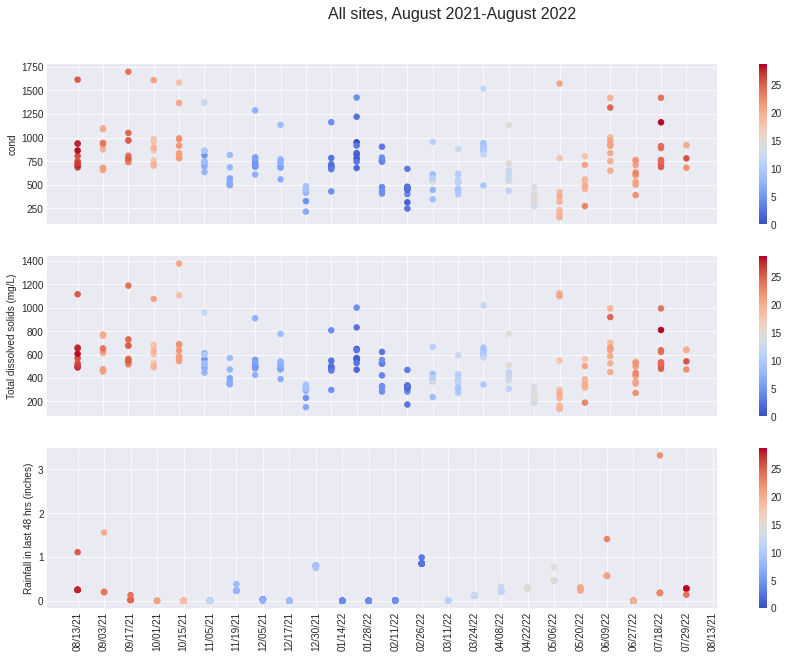

In [56]:
# plot the conductivity, total dissolved solids, and water temperature from August 2021 to August 2022

style.use("seaborn-darkgrid")

fig2, (ax1, ax2, ax3) = plt.subplots(3,1,sharey=False, figsize=(15,10))

fig2.suptitle('All sites, August 2021-August 2022', fontsize=16, y = 0.96)

orig_map=plt.cm.get_cmap('coolwarm')
reversed_map = orig_map

# Conductivity

biweek.plot(ax = ax1, kind='scatter', s = 30, \
            x='date', y= 'cond', c= biweek.temp, cmap = reversed_map)
ax1.set_ylabel('cond')
ax1.set_xlabel('')
ax1.set(xticklabels=[])
ax1.grid(True)

# Total dissolved solids

biweek.plot(ax = ax2, kind='scatter', s = 30, \
            x='date', y= 'tds', c = biweek.temp, cmap = reversed_map)
ax2.set_ylabel('Total dissolved solids (mg/L)')
ax2.set_xlabel('')
ax2.set(xticklabels=[])
ax2.grid(True)

# Rainfall in last 48 hrs 

biweek.plot(ax = ax3, kind='scatter', s = 30, \
            x='date', y= 'rainfall', c = biweek.temp, cmap = reversed_map)
ax3.set_ylabel('Rainfall in last 48 hrs (inches)')
ax3.set_xlabel('')
ax3.set_xticklabels(biweek.date, rotation = 90)
ax3.grid(True);

''

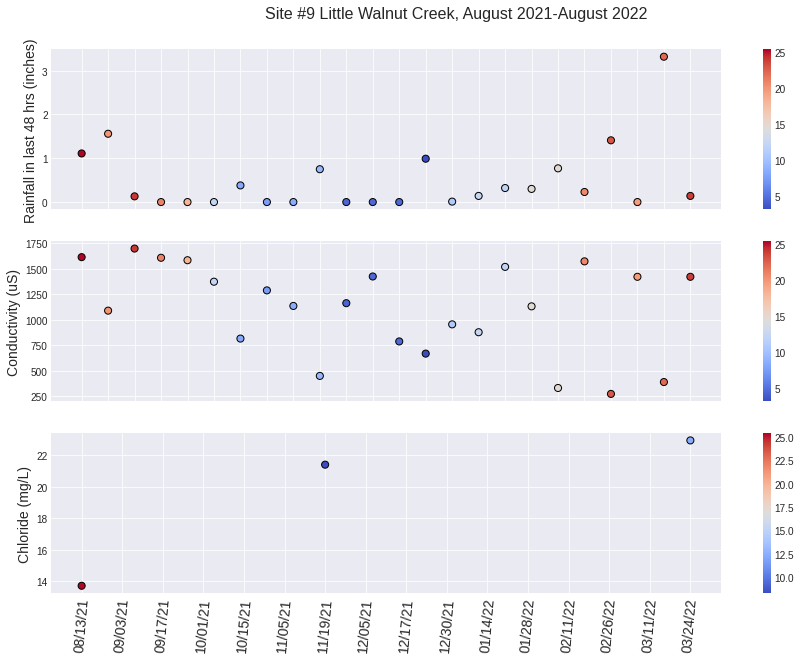

In [81]:
# plot the conductivity, total dissolved solids, and water temperature from August 2021 to August 2022

style.use("seaborn-darkgrid")

fig2, (ax1, ax2, ax3) = plt.subplots(3,1,sharey=False, figsize=(15,10))

fig2.suptitle('Site #9 Little Walnut Creek, August 2021-August 2022', fontsize=16, y = 0.94)

orig_map=plt.cm.get_cmap('coolwarm')
reversed_map = orig_map

# Rainfall in last 48 hrs 

biweek9.plot(ax = ax1, kind='scatter', s = 50, edgecolor = 'black', \
            x='date', y= 'rainfall', c = biweek9.temp, cmap = reversed_map)
ax1.set_ylabel('Rainfall in last 48 hrs (inches)', fontsize=14)
ax1.set_xlabel('')
ax1.set(xticklabels=[])
ax1.grid(True)

# Conductivity

biweek9.plot(ax = ax2, kind='scatter', s = 50, edgecolor = 'black', \
            x='date', y= 'cond', c= biweek9.temp, cmap = reversed_map)
ax2.set_ylabel('Conductivity (uS)', fontsize=14)
ax2.set_xlabel('')
ax2.set(xticklabels=[])
ax2.grid(True)

# Analyte

biweek9.plot(ax = ax3, kind='scatter', s = 50, edgecolor = 'black',\
            x='date', y= 'Chloride', c= biweek9.temp, cmap = reversed_map)
ax3.set_ylabel('Chloride (mg/L)', fontsize=14)
ax3.set_xlabel('')
ax3.set_xticklabels(biweek9.date, rotation = 85, fontsize=14)
ax3.grid(True)

;

''

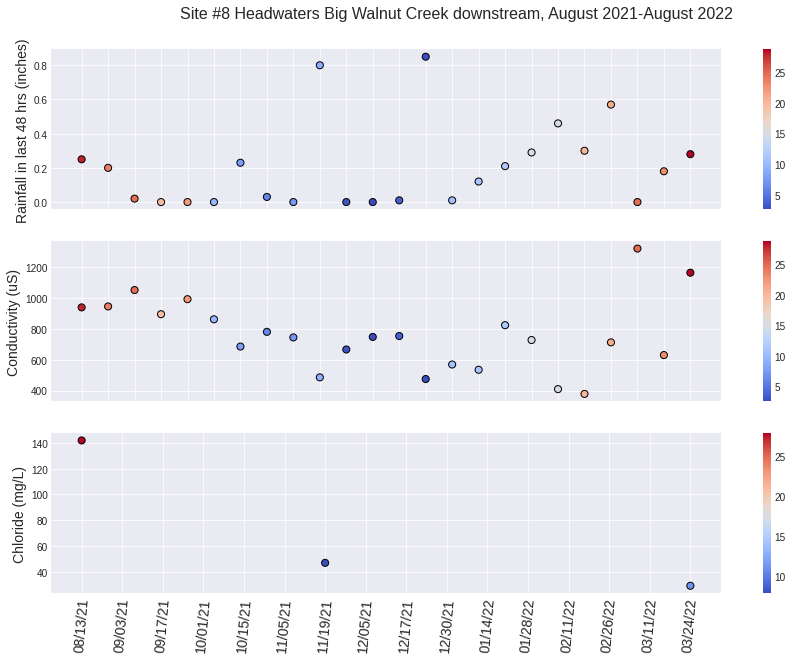

In [82]:
# plot the conductivity, total dissolved solids, and water temperature from August 2021 to August 2022

style.use("seaborn-darkgrid")

fig2, (ax1, ax2, ax3) = plt.subplots(3,1,sharey=False, figsize=(15,10))

fig2.suptitle('Site #8 Headwaters Big Walnut Creek downstream, August 2021-August 2022', fontsize=16, y = 0.94)

orig_map=plt.cm.get_cmap('coolwarm')
reversed_map = orig_map

# Rainfall in last 48 hrs 

biweek8.plot(ax = ax1, kind='scatter', s = 50, edgecolor = 'black', \
            x='date', y= 'rainfall', c = biweek8.temp, cmap = reversed_map)
ax1.set_ylabel('Rainfall in last 48 hrs (inches)', fontsize=14)
ax1.set_xlabel('')
ax1.set(xticklabels=[])
ax1.grid(True)

# Conductivity

biweek8.plot(ax = ax2, kind='scatter', s = 50, edgecolor = 'black', \
            x='date', y= 'cond', c= biweek8.temp, cmap = reversed_map)
ax2.set_ylabel('Conductivity (uS)', fontsize=14)
ax2.set_xlabel('')
ax2.set(xticklabels=[])
ax2.grid(True)

# Analyte

biweek8.plot(ax = ax3, kind='scatter', s = 50, edgecolor = 'black',\
            x='date', y= 'Chloride', c= biweek8.temp, cmap = reversed_map)
ax3.set_ylabel('Chloride (mg/L)', fontsize=14)
ax3.set_xlabel('')
ax3.set_xticklabels(biweek8.date, rotation = 85, fontsize=14)
ax3.grid(True)

;

''

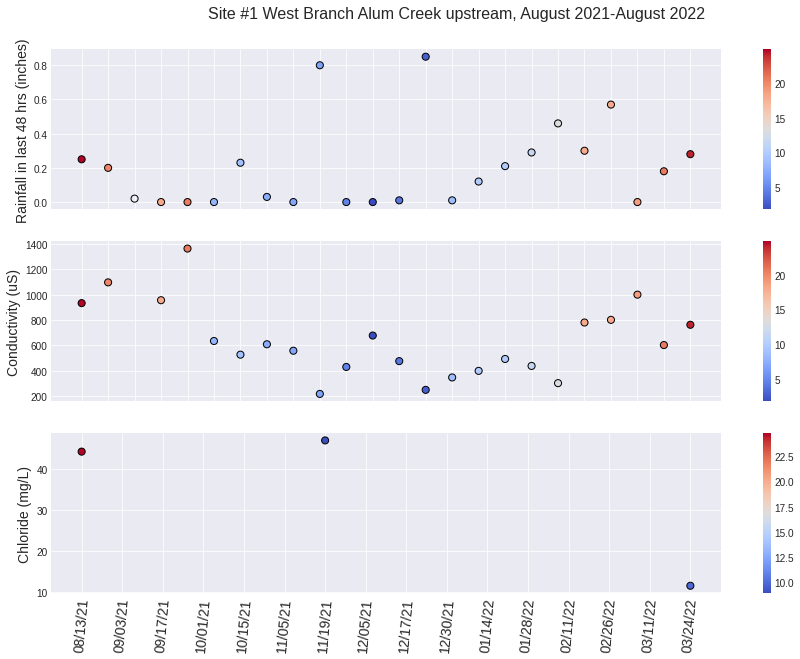

In [83]:
# plot the conductivity, total dissolved solids, and water temperature from August 2021 to August 2022

style.use("seaborn-darkgrid")

fig2, (ax1, ax2, ax3) = plt.subplots(3,1,sharey=False, figsize=(15,10))

fig2.suptitle('Site #1 West Branch Alum Creek upstream, August 2021-August 2022', fontsize=16, y = 0.94)

orig_map=plt.cm.get_cmap('coolwarm')
reversed_map = orig_map

# Rainfall in last 48 hrs 

biweek1.plot(ax = ax1, kind='scatter', s = 50, edgecolor = 'black', \
            x='date', y= 'rainfall', c = biweek1.temp, cmap = reversed_map)
ax1.set_ylabel('Rainfall in last 48 hrs (inches)', fontsize=14)
ax1.set_xlabel('')
ax1.set(xticklabels=[])
ax1.grid(True)

# Conductivity

biweek1.plot(ax = ax2, kind='scatter', s = 50, edgecolor = 'black', \
            x='date', y= 'cond', c= biweek1.temp, cmap = reversed_map)
ax2.set_ylabel('Conductivity (uS)', fontsize=14)
ax2.set_xlabel('')
ax2.set(xticklabels=[])
ax2.grid(True)

# Analyte

biweek1.plot(ax = ax3, kind='scatter', s = 50, edgecolor = 'black',\
            x='date', y= 'Chloride', c= biweek1.temp, cmap = reversed_map)
ax3.set_ylabel('Chloride (mg/L)', fontsize=14)
ax3.set_xlabel('')
ax3.set_xticklabels(biweek1.date, rotation = 85, fontsize=14)
ax3.grid(True)

;

''

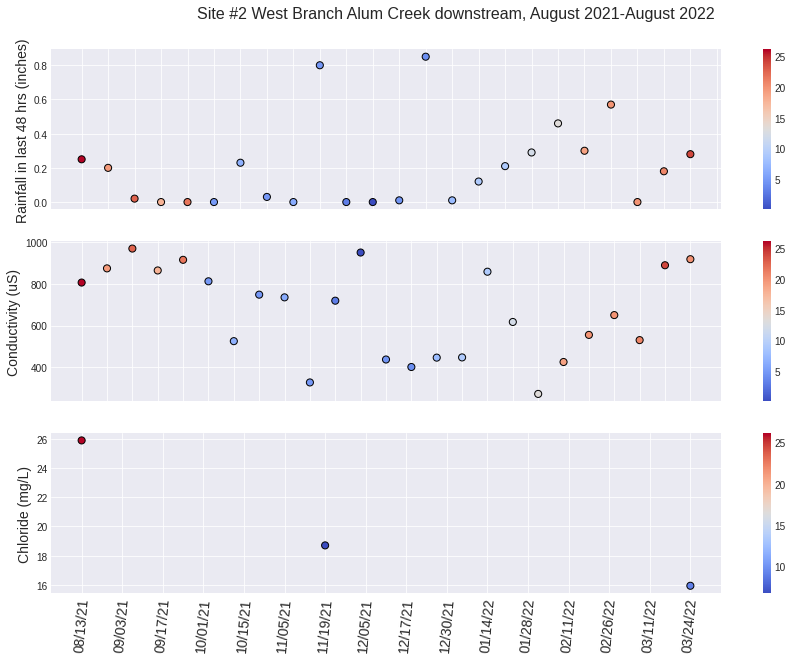

In [84]:
# plot the conductivity, total dissolved solids, and water temperature from August 2021 to August 2022

style.use("seaborn-darkgrid")

fig2, (ax1, ax2, ax3) = plt.subplots(3,1,sharey=False, figsize=(15,10))

fig2.suptitle('Site #2 West Branch Alum Creek downstream, August 2021-August 2022', fontsize=16, y = 0.94)

orig_map=plt.cm.get_cmap('coolwarm')
reversed_map = orig_map

# Rainfall in last 48 hrs 

biweek2.plot(ax = ax1, kind='scatter', s = 50, edgecolor = 'black', \
            x='date', y= 'rainfall', c = biweek2.temp, cmap = reversed_map)
ax1.set_ylabel('Rainfall in last 48 hrs (inches)', fontsize=14)
ax1.set_xlabel('')
ax1.set(xticklabels=[])
ax1.grid(True)

# Conductivity

biweek2.plot(ax = ax2, kind='scatter', s = 50, edgecolor = 'black', \
            x='date', y= 'cond', c= biweek2.temp, cmap = reversed_map)
ax2.set_ylabel('Conductivity (uS)', fontsize=14)
ax2.set_xlabel('')
ax2.set(xticklabels=[])
ax2.grid(True)

# Analyte

biweek2.plot(ax = ax3, kind='scatter', s = 50, edgecolor = 'black',\
            x='date', y= 'Chloride', c= biweek2.temp, cmap = reversed_map)
ax3.set_ylabel('Chloride (mg/L)', fontsize=14)
ax3.set_xlabel('')
ax3.set_xticklabels(biweek2.date, rotation = 85, fontsize=14)
ax3.grid(True)

;

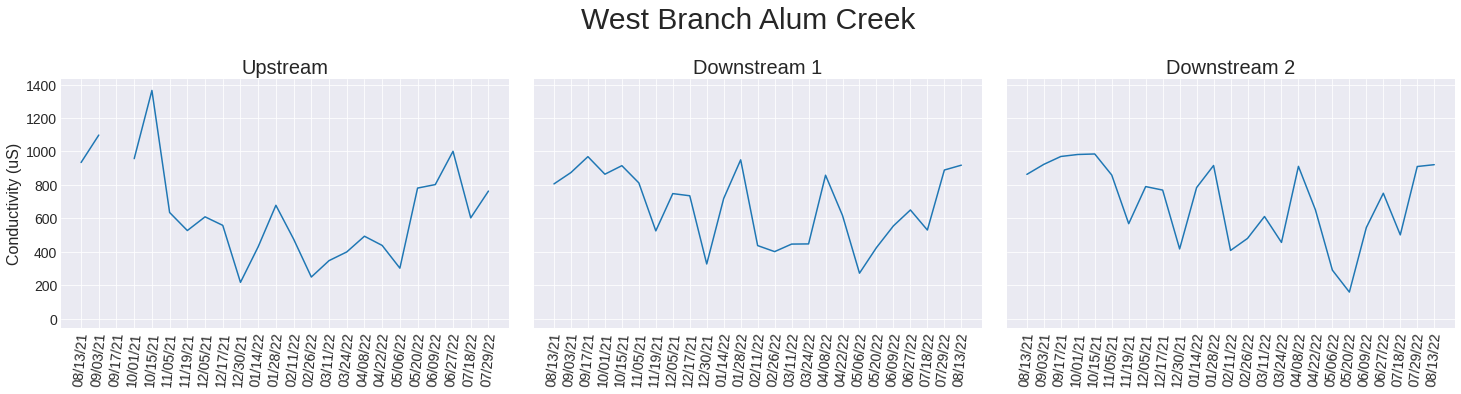

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4), sharey = True)
fig.suptitle('West Branch Alum Creek ', fontsize=30, y = 1.2)
fig.tight_layout()

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

axes[0].plot(biweek1.date, biweek1.cond)
axes[0].set_xticklabels(biweek1.date, rotation = 85, size=SMALL_SIZE)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].set_ylabel('Conductivity (uS)', size=MEDIUM_SIZE)
axes[0].set_title('Upstream', size=BIGGER_SIZE)

axes[1].plot(biweek2.date, biweek2.cond)
axes[1].set_xticklabels(biweek2.date, rotation = 85, size=SMALL_SIZE)
axes[1].set_title('Downstream 1', size=BIGGER_SIZE)

axes[2].plot(biweek3.date, biweek3.cond)
axes[2].set_xticklabels(biweek3.date, rotation = 85, size=SMALL_SIZE)
axes[2].set_title('Downstream 2', size=BIGGER_SIZE);

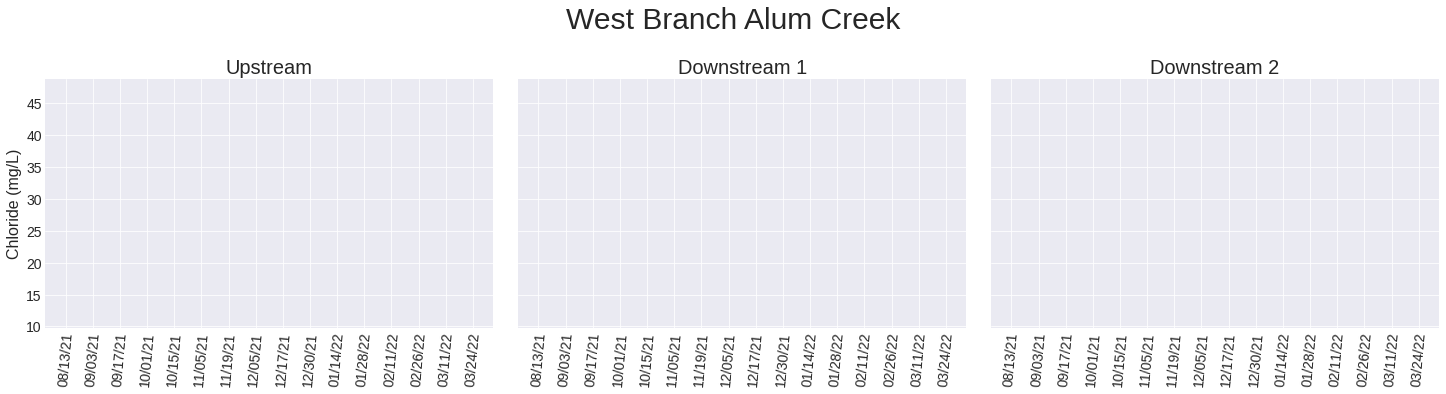

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4), sharey = True)
fig.suptitle('West Branch Alum Creek ', fontsize=30, y = 1.2)
fig.tight_layout()

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

axes[0].plot(biweek1.date, biweek1.Chloride)
axes[0].set_xticklabels(biweek1.date, rotation = 85, size=SMALL_SIZE)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].set_ylabel('Chloride (mg/L)', size=MEDIUM_SIZE)
axes[0].set_title('Upstream', size=BIGGER_SIZE)

axes[1].plot(biweek2.date, biweek2.Chloride)
axes[1].set_xticklabels(biweek2.date, rotation = 85, size=SMALL_SIZE)
axes[1].set_title('Downstream 1', size=BIGGER_SIZE)

axes[2].plot(biweek3.date, biweek3.Chloride)
axes[2].set_xticklabels(biweek3.date, rotation = 85, size=SMALL_SIZE)
axes[2].set_title('Downstream 2', size=BIGGER_SIZE);

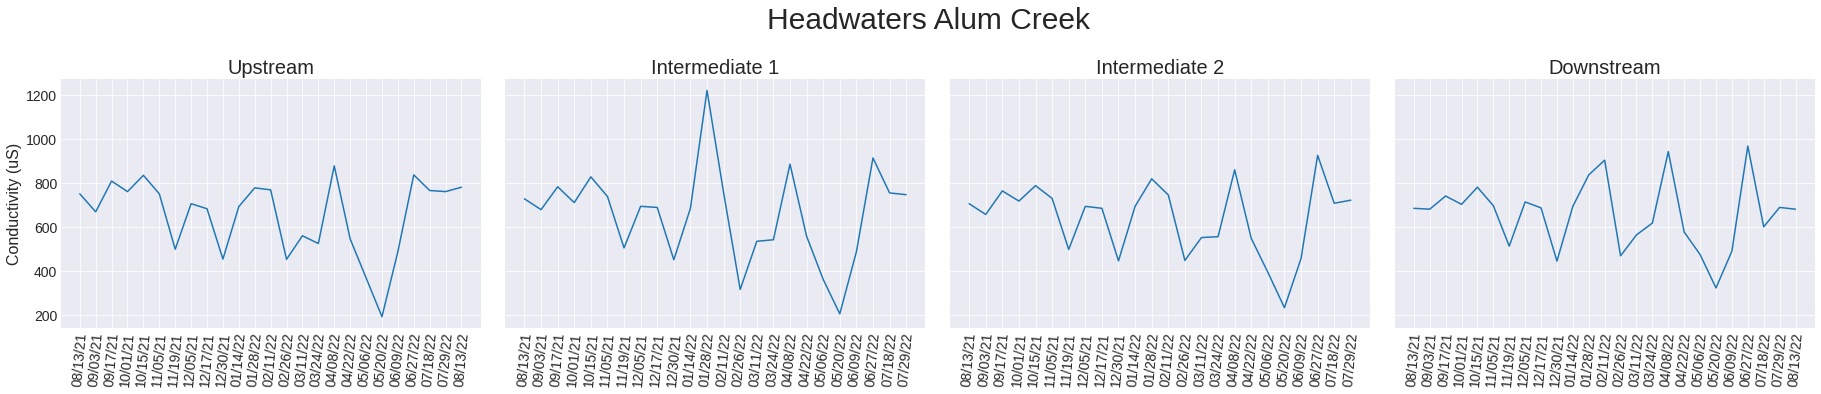

In [59]:
fig, axes = plt.subplots(1, 4, figsize=(25, 4), sharey = True)
fig.suptitle('Headwaters Alum Creek ', fontsize=30, y = 1.2)
fig.tight_layout()

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

axes[0].plot(biweek4.date, biweek4.cond)
axes[0].set_xticklabels(biweek4.date, rotation = 85, size=SMALL_SIZE)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].set_ylabel('Conductivity (uS)', size=MEDIUM_SIZE)
axes[0].set_title('Upstream', size=BIGGER_SIZE)

axes[1].plot(biweek7.date, biweek7.cond)
axes[1].set_xticklabels(biweek7.date, rotation = 85, size=SMALL_SIZE)
axes[1].set_title('Intermediate 1', size=BIGGER_SIZE)

axes[2].plot(biweek6.date, biweek6.cond)
axes[2].set_xticklabels(biweek6.date, rotation = 85, size=SMALL_SIZE)
axes[2].set_title('Intermediate 2', size=BIGGER_SIZE)

axes[3].plot(biweek5.date, biweek5.cond)
axes[3].set_xticklabels(biweek5.date, rotation = 85, size=SMALL_SIZE)
axes[3].set_title('Downstream', size=BIGGER_SIZE);

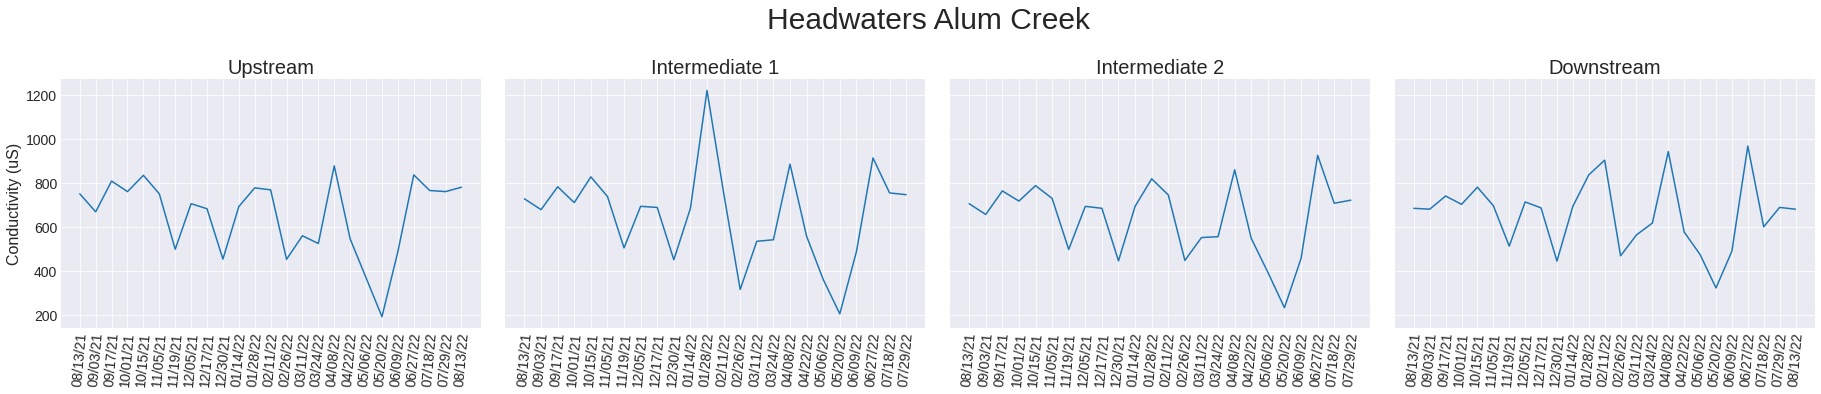

In [59]:
fig, axes = plt.subplots(1, 4, figsize=(25, 4), sharey = True)
fig.suptitle('Headwaters Big Walnut Creek ', fontsize=30, y = 1.2)
fig.tight_layout()

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

axes[0].plot(biweek4.date, biweek4.cond)
axes[0].set_xticklabels(biweek4.date, rotation = 85, size=SMALL_SIZE)
axes[0].tick_params(axis='y', labelsize=14)
axes[0].set_ylabel('Conductivity (uS)', size=MEDIUM_SIZE)
axes[0].set_title('Upstream', size=BIGGER_SIZE)

axes[1].plot(biweek7.date, biweek7.cond)
axes[1].set_xticklabels(biweek7.date, rotation = 85, size=SMALL_SIZE)
axes[1].set_title('Intermediate 1', size=BIGGER_SIZE)

axes[2].plot(biweek6.date, biweek6.cond)
axes[2].set_xticklabels(biweek6.date, rotation = 85, size=SMALL_SIZE)
axes[2].set_title('Intermediate 2', size=BIGGER_SIZE)

axes[3].plot(biweek5.date, biweek5.cond)
axes[3].set_xticklabels(biweek5.date, rotation = 85, size=SMALL_SIZE)
axes[3].set_title('Downstream', size=BIGGER_SIZE);